## Section 1.2 - Experimenting with K-means Clustering and GMMs

In [18]:
import numpy as np
from random import randrange
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from scipy.stats import multivariate_normal

In [19]:
def synth_data(sigma, N):
    N=int(N/3)
    # P_a distribution
    mu_a = np.array([-1,-1])
    cov_a = sigma * np.array([[2,0.5], [0.5,1]])
    x_a, y_a = np.random.multivariate_normal(mu_a, cov_a, N).T
    
    # P_b distribution
    mu_b = np.array([1,-1])
    cov_b = sigma * np.array([[1,-0.5], [-0.5,2]])
    x_b, y_b = np.random.multivariate_normal(mu_b, cov_b, N).T
    
    # P_c distribution
    mu_c = np.array([0,1])
    cov_c = sigma * np.array([[1,0], [0,2]])
    x_c, y_c = np.random.multivariate_normal(mu_c, cov_c, N).T
    
    x = np.concatenate((x_a,np.concatenate((x_b,x_c), axis=0)),axis=0)
    y = np.concatenate((y_a,np.concatenate((y_b,y_c), axis=0)),axis=0)
    
    return (x, y)

### K-Means Clustering

In [20]:
class KMeans():
    def __init__(self):
        self.centers = None
        self.x1 = None
        self.x2 = None
        self.k = None
        self.set_assignments = None
        self.cluster_sets = None
        
    def cluster(self, k, x1, x2):
        self.x1 = x1
        self.x2 = x2
        self.k = k
        # initialize the centers randomily then choose a center and pick points furthest from other centers
        idx = randrange(len(x1))
        centers = [[x1[idx],x2[idx]]]
        for i in range(2,k+1):
            D = []
            for j in range(0,len(x1)):
                D_j_arr = []
                for c in centers:
                    D_j_arr.append((x1[j]-c[0])**2 + (x2[j]-c[1])**2)
                D.append(min(D_j_arr))
            idx_Ci = np.argmax(D)
            centers.append([x1[idx_Ci],x2[idx_Ci]])
        
        # perform K-means algorithm
        prev_centers = None
        set_assignments = []
        S = dict() #cluster point sets
        while prev_centers != centers:
            prev_centers = []
            for i in range(k):
                prev_centers.append(centers[i])
            # step 1: assign points to each cluster
            for i in range(0,k):
                S[i] = []
            set_assignments = []
            for i in range(len(x1)):
                dists_i = []
                for c in centers:
                    dists_i.append((x1[i]-c[0])**2 + (x2[i]-c[1])**2)
                set_assignments.append(np.argmin(dists_i))
            for i in range(len(x1)):
                S[set_assignments[i]].append([x1[i],x2[i]])
            # update centers
            for i in range(k):
                x,y = 0,0
                for point in S[i]:
                    x += point[0]
                    y += point[1]
                centers[i] = [x/len(S[i]),y/len(S[i])]
        self.cluster_sets = S
        self.set_assignments = set_assignments
        self.centers = centers
            
    def center(self):
        return self.centers
    
    def accuracy(self,labels):
        prob_dist_centers = []
        for i in range(self.k):
            dists = []
            for c in self.centers:
                dists.append((np.mean(x1[i*100:(i+1)*100])-c[0])**2 + (np.mean(x2[i*100:(i+1)*100])-c[1])**2)
            prob_dist_centers.append(np.argmin(dists))
        # set assignments should be labeled according to their center's corresponding distribution
        pred_dist = self.set_assignments
        dist_names = ['a','b','c']
        for i in range(self.k):
            letter = dist_names[i]
            pred_dist = [(j,letter)[j==prob_dist_centers[i]] for j in pred_dist]
        return sum(x == y for x, y in zip(pred_dist, labels)) / len(labels)
    
    def objective_val(self,):
        sum_euclid_dists = 0
        for i in range(self.k):
            c = self.centers[i]
            for j in range(len(self.cluster_sets[i])):
                point = self.cluster_sets[i][j]
                sum_euclid_dists += (c[0]-point[0])**2 + (c[1]-point[1])**2
        return sum_euclid_dists

In [21]:
sigmas = [0.5, 1, 2, 4, 8]
N = 300

letters = ['a','b','c']
labels = []
for l in letters:
    for i in range(0,100):
        labels.append(l)
        
accs = []
obj_vals = []
for sig in sigmas:
    x1,x2 = synth_data(sig, N)
    model = KMeans()
    model.cluster(k=3,x1=x1,x2=x2)
    
    obj_vals.append(model.objective_val())
    
    accs.append(model.accuracy(labels))

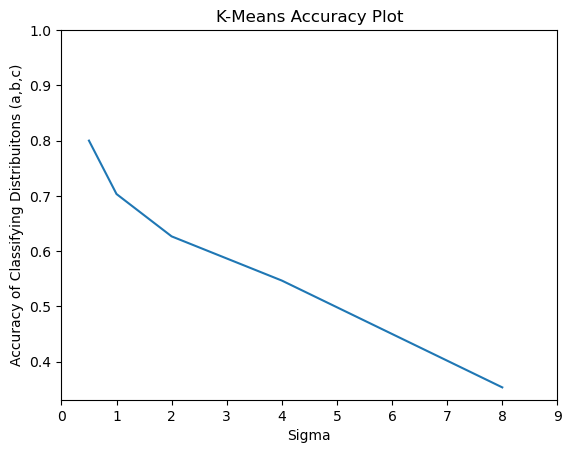

In [22]:
# Plotting Accuracy
plt.plot(sigmas,accs)
plt.xlabel("Sigma")
plt.ylabel("Accuracy of Classifying Distribuitons (a,b,c)")
plt.title("K-Means Accuracy Plot")
plt.xticks(np.arange(0, 9.1, 1))
plt.yticks(np.arange(0.4, 1.01, .1));

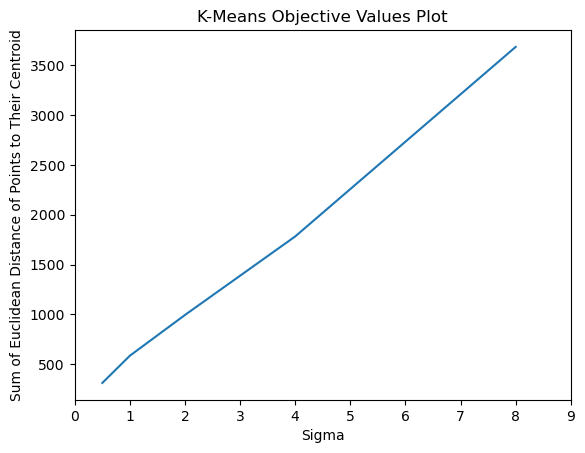

In [23]:
# Plotting Objective Values
plt.plot(sigmas,obj_vals)
plt.xlabel("Sigma")
plt.ylabel("Sum of Euclidean Distance of Points to Their Centroid")
plt.title("K-Means Objective Values Plot")
plt.xticks(np.arange(0, 9.1, 1));

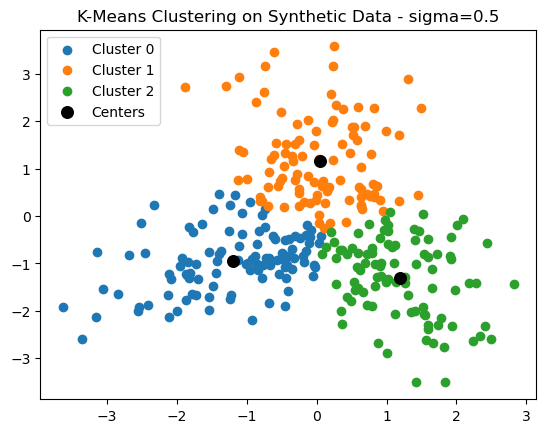

In [24]:
# Model Example - sigma=0.5
k = 3
sigma = 0.5
x1, x2 = synth_data(sigma, 300)
model = KMeans()
model.cluster(k, x1, x2)
c = np.array(model.center())

# Get the cluster assignments from the KMeans model
assignments = model.set_assignments

# Plot the points using the cluster assignments from KMeans
for i in range(k):
    plt.scatter(np.array(model.cluster_sets[i])[:, 0], np.array(model.cluster_sets[i])[:, 1], label=f'Cluster {i}')
plt.scatter(c[:, 0], c[:, 1], s=70, label='Centers', c='black')
plt.title("K-Means Clustering on Synthetic Data - sigma=0.5")
plt.legend()
plt.show()

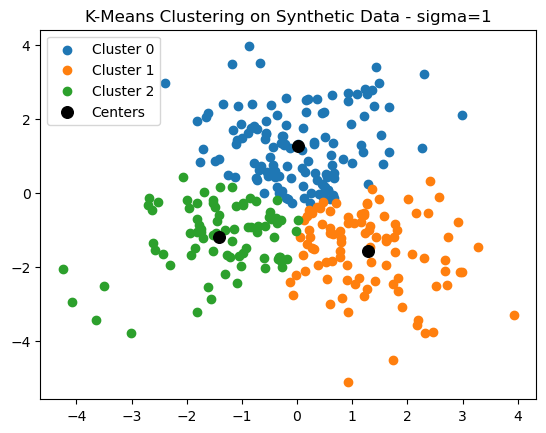

In [25]:
# Model Example - sigma=1
k = 3
sigma = 1
x1, x2 = synth_data(sigma, 300)
model = KMeans()
model.cluster(k, x1, x2)
c = np.array(model.center())

# Get the cluster assignments from the KMeans model
assignments = model.set_assignments

# Plot the points using the cluster assignments from KMeans
for i in range(k):
    plt.scatter(np.array(model.cluster_sets[i])[:, 0], np.array(model.cluster_sets[i])[:, 1], label=f'Cluster {i}')
plt.scatter(c[:, 0], c[:, 1], s=70, label='Centers', c='black')
plt.title("K-Means Clustering on Synthetic Data - sigma=1")
plt.legend()
plt.show()

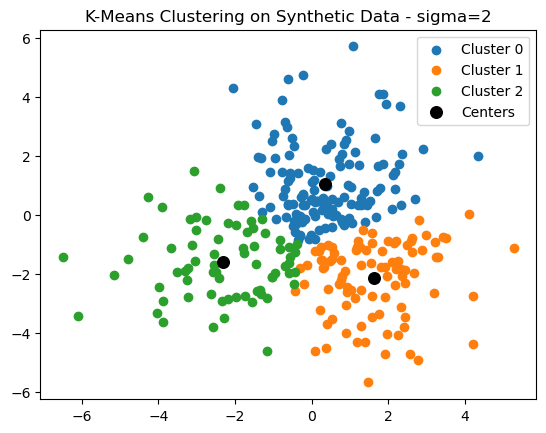

In [26]:
# Model Example - sigma=2
k = 3
sigma = 2
x1, x2 = synth_data(sigma, 300)
model = KMeans()
model.cluster(k, x1, x2)
c = np.array(model.center())

# Get the cluster assignments from the KMeans model
assignments = model.set_assignments

# Plot the points using the cluster assignments from KMeans
for i in range(k):
    plt.scatter(np.array(model.cluster_sets[i])[:, 0], np.array(model.cluster_sets[i])[:, 1], label=f'Cluster {i}')
plt.scatter(c[:, 0], c[:, 1], s=70, label='Centers', c='black')
plt.title("K-Means Clustering on Synthetic Data - sigma=2")
plt.legend()
plt.show()

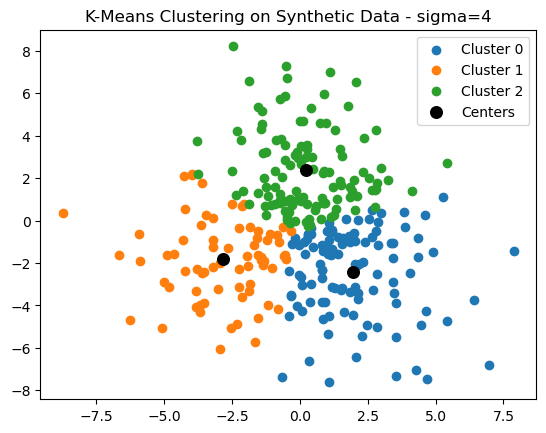

In [27]:
# Model Example - sigma=4
k = 3
sigma = 4
x1, x2 = synth_data(sigma, 300)
model = KMeans()
model.cluster(k, x1, x2)
c = np.array(model.center())

# Get the cluster assignments from the KMeans model
assignments = model.set_assignments

# Plot the points using the cluster assignments from KMeans
for i in range(k):
    plt.scatter(np.array(model.cluster_sets[i])[:, 0], np.array(model.cluster_sets[i])[:, 1], label=f'Cluster {i}')
plt.scatter(c[:, 0], c[:, 1], s=70, label='Centers', c='black')
plt.title("K-Means Clustering on Synthetic Data - sigma=4")
plt.legend()
plt.show()

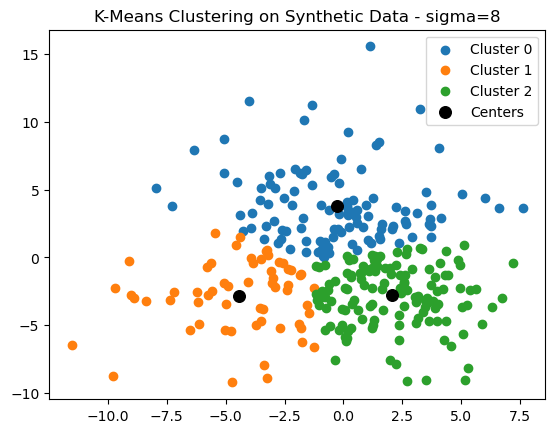

In [28]:
# Model Example - sigma=8
k = 3
sigma = 8
x1, x2 = synth_data(sigma, 300)
model = KMeans()
model.cluster(k, x1, x2)
c = np.array(model.center())

# Get the cluster assignments from the KMeans model
assignments = model.set_assignments

# Plot the points using the cluster assignments from KMeans
for i in range(k):
    plt.scatter(np.array(model.cluster_sets[i])[:, 0], np.array(model.cluster_sets[i])[:, 1], label=f'Cluster {i}')
plt.scatter(c[:, 0], c[:, 1], s=70, label='Centers', c='black')
plt.title("K-Means Clustering on Synthetic Data - sigma=8")
plt.legend()
plt.show()

### Gaussian Mixture Model

In [171]:
class GMM():
    def __init__(self, max_iter, tol):
        self.max_iter = max_iter # max number of times to run EM algo
        self.tol = tol # convergence is acheived if delta_loglikelihood <= tolerance
        self.x1 = None
        self.x2 = None
        self.k = None
        self.log_likelihood = None
        self.means = None
        self.covariances = None
        self.w = None
        self.p = None
        self.converged = False
        
    def _update_probs(self,):
        """
        E Step: where probabilities of each sample is calculated based on the current parameters
        """
        for i in range(self.k):
            likelihood = multivariate_normal(self.means[i], self.covariances[i]).pdf(np.vstack((self.x1,self.x2)).T) 
            self.p[:,i] = self.w[i] * likelihood
        self.p = self.p/np.sum(self.p, axis=1, keepdims=True)
        
    def _update_params(self,):
        """
        M Step: where parameters get updated.
        """
        self.w = np.sum(self.p,axis=0) / len(self.x2) # percentage of samples belonging to each of k distribtions
        self.means = np.dot(self.p.T,np.vstack((self.x1,self.x2)).T) / np.vstack(np.sum(self.p,axis=0))
        for i in range(self.k):
            dist = np.vstack((self.x1,self.x2)).T - self.means[i]
            self.covariances[i] = np.dot(self.p[:,i]*dist.T,dist) / np.sum(self.p,axis=0)[i]
                
    def _loglikelihood(self):
        weight_likelihood = np.zeros((len(self.x1),self.k))
        for i in range(self.k):
            likelihood = multivariate_normal(self.means[i], self.covariances[i]).pdf(np.vstack((self.x1,self.x2)).T) 
            weight_likelihood[:,i] = self.w[i] * likelihood
        self.log_likelihood = - np.sum(np.log(np.sum(weight_likelihood,axis=1)))
        return self.log_likelihood
        
    def cluster(self, k, x1, x2):
        self.x1 = x1
        self.x2 = x2
        self.k = k # number of "clusters" (guassian distributions)
        
        # initialize the centers randomily then choose a center and pick points furthest from other centers
        idx = randrange(len(x1))
        means = [np.array([x1[idx],x2[idx]])]
        for i in range(2,k+1):
            D = []
            for j in range(0,len(x1)):
                D_j_arr = []
                for mu in means:
                    D_j_arr.append((x1[j]-mu[0])**2 + (x2[j]-mu[1])**2)
                D.append(min(D_j_arr))
            idx_mu = np.argmax(D)
            means.append(np.array([x1[idx_mu],x2[idx_mu]]))
        self.means = means
        
        # initialize the cov matrices to be the cov of all the data
        # NOTE: there are k 2x2 cov matrices because we're exlusively dealing with 2-d cont datasets
        self.covariances = np.full((k,2,2), np.cov(np.vstack((x1,x2)).T, rowvar = False))
        
        # initialize the weights to be 1/k for all k clusters
        self.w = np.ones(k)/k
        
        # initialize the probs an observation belongs to a given cluster
        self.p = np.ones((len(x1),k))/k
            
        prev_loglikelihood, new_loglikelihood = 0,0
        for i in range(self.max_iter):
            # E-step
            self._update_probs()
            # M-step
            self._update_params()
            # Check for convergence (delta_log_likelikhood <= tol)
            new_log_likelihood = self._loglikelihood()
            delta_log_likelihood = prev_loglikelihood - new_loglikelihood 
            if(abs(delta_log_likelihood) <= self.tol):
                self.converged = True
                break
            prev_loglikelihood = new_log_likelihood
                
    def get_means(self,):
        return self.means
    
    def get_covs(self,):
        return self.covariances
    
    def get_objective_val(self,):
        return self.log_likelihood
    
    def get_accuracy(self,labels):
        proba_dist_centroids = []
        for i in range(self.k):
            dists = []
            for mu in self.means:
                dists.append((np.mean(x1[i*100:(i+1)*100])-mu[0])**2 + (np.mean(x2[i*100:(i+1)*100])-mu[1])**2)
            proba_dist_centroids.append(np.argmin(dists))
        # label the set assignments according to their center's corresponding distribution
        predicted_dist = np.argmax(self.p,axis=1)
        dist_names = ['a','b','c']
        for i in range(self.k):
            letter = dist_names[i]
            predicted_dist = [(j,letter)[j==proba_dist_centroids[i]] for j in predicted_dist]
        # find the precentage of matching labels
        return sum(x == y for x, y in zip(predicted_dist, labels)) / len(labels)
    
    def get_termination_status(self,):
        return self.converged
    
    def get_p(self):
        return self.p
    
    def get_w(self):
        return self.w

In [231]:
sigmas = [0.5, 1, 2, 4, 8]
N = 300

letters = ['a','b','c']
labels = []
for l in letters:
    for i in range(0,100):
        labels.append(l)
        
accs = []
obj_vals = []
for sigma in sigmas:
    x1,x2 = synth_data(sigma, N)
    model = GMM(max_iter=1000, tol=1e-5)
    model.cluster(k=3,x1=x1,x2=x2)
    
    # evaluate based on clustering objective
    obj_vals.append(model.get_objective_val())
    
    # evaluate based on clustering accuracy based on the 3 dists
    accs.append(model.get_accuracy(labels))

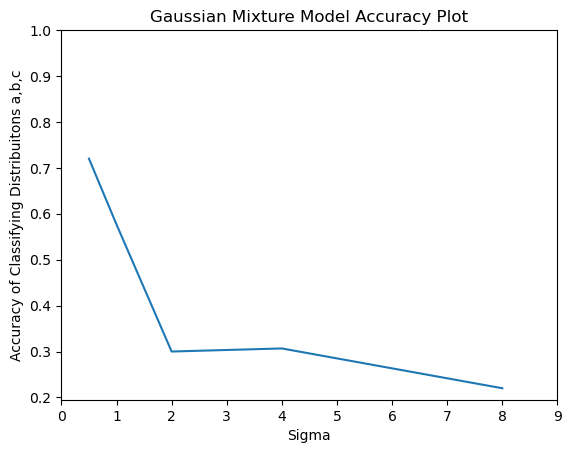

In [232]:
# Plotting Accuracy
plt.plot(sigmas,accs)
plt.xlabel("Sigma")
plt.ylabel("Accuracy of Classifying Distribuitons a,b,c")
plt.title("Gaussian Mixture Model Accuracy Plot")
plt.xticks(np.arange(0, 9.1, 1))
plt.yticks(np.arange(0.2, 1.01, .1));

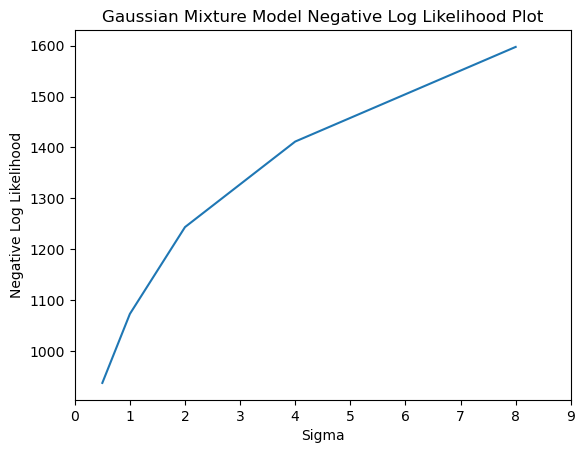

In [233]:
# Plotting Objective Values
plt.plot(sigmas,obj_vals)
plt.xlabel("Sigma")
plt.ylabel("Negative Log Likelihood")
plt.title("Gaussian Mixture Model Negative Log Likelihood Plot")
plt.xticks(np.arange(0, 9.1, 1));

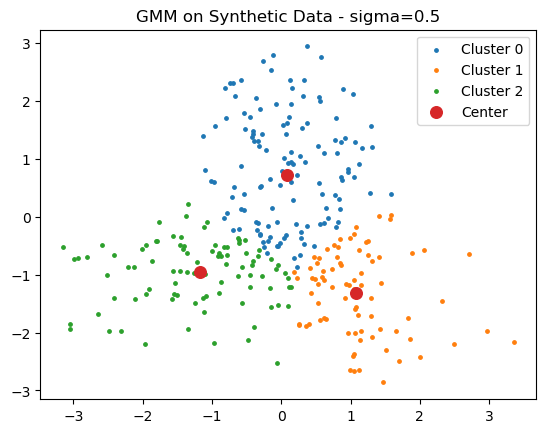

In [267]:
# Model Example - sigma = 0.5
sigma = 0.5
x1, x2 = synth_data(sigma, 300)
model = GMM(max_iter=500, tol=1e-5)
model.cluster(3, x1, x2)

# Get the GMM cluster labels
predicted_labels = np.argmax(model.get_p(), axis=1)

# Plot the data points with GMM-assigned labels
plt.scatter(x1[predicted_labels == 0], x2[predicted_labels == 0], s=6, label='Cluster 0')
plt.scatter(x1[predicted_labels == 1], x2[predicted_labels == 1], s=6, label='Cluster 1')
plt.scatter(x1[predicted_labels == 2], x2[predicted_labels == 2], s=6, label='Cluster 2')
plt.scatter(model.get_means()[:, 0], model.get_means()[:, 1], s=70, label='Center')
plt.title("GMM on Synthetic Data - sigma=0.5")
plt.legend()
plt.show()

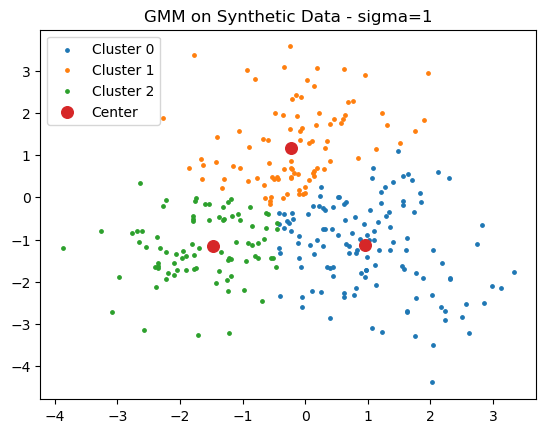

In [278]:
# Model Example - sigma = 1
sigma = 1
x1, x2 = synth_data(sigma, 300)
model = GMM(max_iter=500, tol=1e-5)
model.cluster(3, x1, x2)

# Get the GMM cluster labels
predicted_labels = np.argmax(model.get_p(), axis=1)

# Plot the data points with GMM-assigned labels
plt.scatter(x1[predicted_labels == 0], x2[predicted_labels == 0], s=6, label='Cluster 0')
plt.scatter(x1[predicted_labels == 1], x2[predicted_labels == 1], s=6, label='Cluster 1')
plt.scatter(x1[predicted_labels == 2], x2[predicted_labels == 2], s=6, label='Cluster 2')
plt.scatter(model.get_means()[:, 0], model.get_means()[:, 1], s=70, label='Center')
plt.title("GMM on Synthetic Data - sigma=1")
plt.legend()
plt.show()

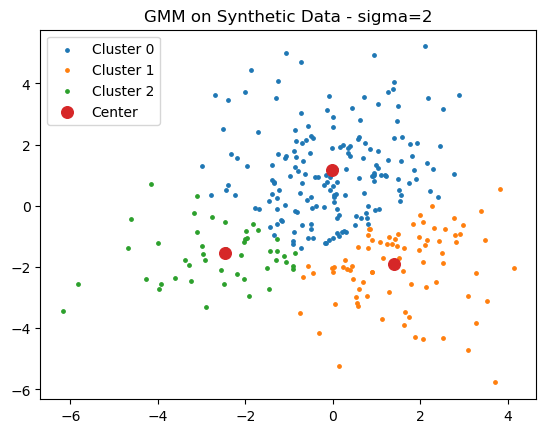

In [282]:
# Model Example - sigma = 2
sigma = 2
x1, x2 = synth_data(sigma, 300)
model = GMM(max_iter=500, tol=1e-5)
model.cluster(3, x1, x2)

# Get the GMM cluster labels
predicted_labels = np.argmax(model.get_p(), axis=1)

# Plot the data points with GMM-assigned labels
plt.scatter(x1[predicted_labels == 0], x2[predicted_labels == 0], s=6, label='Cluster 0')
plt.scatter(x1[predicted_labels == 1], x2[predicted_labels == 1], s=6, label='Cluster 1')
plt.scatter(x1[predicted_labels == 2], x2[predicted_labels == 2], s=6, label='Cluster 2')
plt.scatter(model.get_means()[:, 0], model.get_means()[:, 1], s=70, label='Center')
plt.title("GMM on Synthetic Data - sigma=2")
plt.legend()
plt.show()

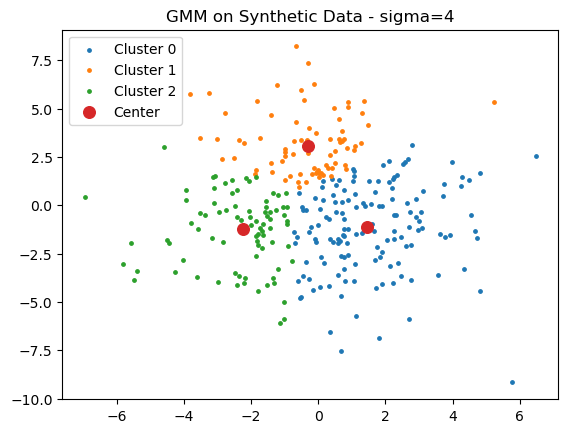

In [75]:
# Model Example - sigma = 4
sigma = 4
x1, x2 = synth_data(sigma, 300)
model = GMM(max_iter=500, tol=1e-5)
model.cluster(3, x1, x2)

# Get the GMM cluster labels
predicted_labels = np.argmax(model.get_p(), axis=1)

# Plot the data points with GMM-assigned labels
plt.scatter(x1[predicted_labels == 0], x2[predicted_labels == 0], s=6, label='Cluster 0')
plt.scatter(x1[predicted_labels == 1], x2[predicted_labels == 1], s=6, label='Cluster 1')
plt.scatter(x1[predicted_labels == 2], x2[predicted_labels == 2], s=6, label='Cluster 2')
plt.scatter(model.get_means()[:, 0], model.get_means()[:, 1], s=70, label='Center')
plt.title("GMM on Synthetic Data - sigma=4")
plt.legend()
plt.show()

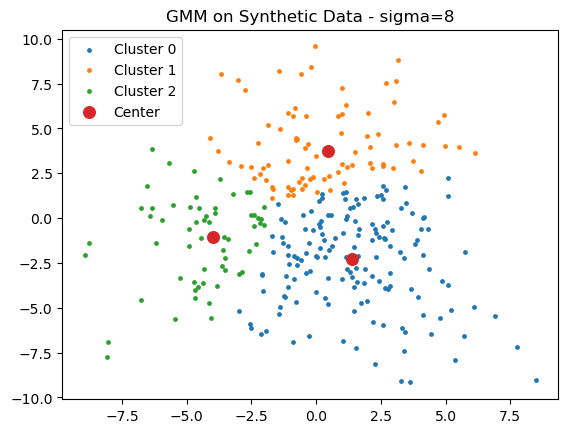

In [101]:
# Model Example - sigma = 8
sigma = 8
x1, x2 = synth_data(sigma, 300)
model = GMM(max_iter=500, tol=1e-5)
model.cluster(3, x1, x2)

# Get the GMM cluster labels
predicted_labels = np.argmax(model.get_p(), axis=1)

# Plot the data points with GMM-assigned labels
plt.scatter(x1[predicted_labels == 0], x2[predicted_labels == 0], s=6, label='Cluster 0')
plt.scatter(x1[predicted_labels == 1], x2[predicted_labels == 1], s=6, label='Cluster 1')
plt.scatter(x1[predicted_labels == 2], x2[predicted_labels == 2], s=6, label='Cluster 2')
plt.scatter(model.get_means()[:, 0], model.get_means()[:, 1], s=70, label='Center')
plt.title("GMM on Synthetic Data - sigma=8")
plt.legend()
plt.show()

## Section 2.3 - Experimenting with Principal Components Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 50 samples, 2 features
X_2 = pd.read_csv("data/data2D.csv",names=np.arange(0,2).tolist()).to_numpy()

# 500 samples, 1000 features
X_1000 = pd.read_csv("data/data1000D.csv",names=np.arange(0,1000).tolist()).to_numpy() 

In [2]:
def plot(X_orig, X_reconstructed, title):
    plt.scatter(X_orig[:,0],X_orig[:,1],marker='o',facecolors='none', edgecolors='b',s=20,label="Original Datapoints")
    plt.scatter(X_reconstructed[:,0],X_reconstructed[:,1], marker='x',c='r',s=20,label="Reconstructed Datapoints")
    plt.xticks(np.arange(0, 11, 1))
    plt.yticks(np.arange(0, 11, 1))
    plt.legend()
    plt.title(title,fontweight="bold");

In [3]:
def square_sum_of_diffs(X_orig, X_reconstructed):
    return np.sum(np.square(X_orig - X_reconstructed))/len(X_orig)

Parameter X: m x n input matrix with n-dimensions

Parameter d: desired dimension of reduced matrix

return: tuple (eigenvalues, reconstructed matrix)

### Buggy PCA

In [36]:
def buggy_pca(X, d):    
    m,n = X.shape
    
    # SVD of X
    U, s, V = np.linalg.svd(X)
    eigenvalues = s[0:d]**2
    print(np.matrix(U))
    print(np.matrix(V))
    print(s)
    
    # low dim representation of X
    Z = np.dot(X,V[0:d].T)
    print(Z)
    
    # reduced version of X
    X_r = np.dot(Z.reshape(m,d),V[0:d].reshape(d,n))
    display(X_r)
    
    return (eigenvalues, X_r)

In [37]:
eigenvalues, X_r = buggy_pca(X=X_2, d=1)
buggy_pca_ssd = square_sum_of_diffs(X_2, X_r)
print("Squared Sum of Differences on 2D Data: %.6f"%buggy_pca_ssd)

[[-0.15494319  0.13366251 -0.08555984 ... -0.10054955 -0.1326369
  -0.15623642]
 [-0.12372957 -0.22866447 -0.18534686 ... -0.1337252  -0.04857513
   0.00988554]
 [-0.13293785 -0.15350427  0.96611304 ... -0.02784651 -0.0185271
  -0.01226614]
 ...
 [-0.13321899 -0.0997056  -0.02678001 ...  0.97694731 -0.01761208
  -0.01402764]
 [-0.14075759 -0.00886985 -0.01549914 ... -0.01570695  0.98309222
  -0.01791517]
 [-0.14744172  0.05394101 -0.0078484  ... -0.01078342 -0.01659589
   0.97920645]]
[[-0.74153126 -0.67091832]
 [ 0.67091832 -0.74153126]]
[58.06602865  6.65921573]
[[-8.99693578]
 [-7.18448493]
 [-7.71917279]
 [-9.00887077]
 [-8.29400947]
 [-8.02366362]
 [-7.85715578]
 [-7.37556474]
 [-8.30713968]
 [-7.81528137]
 [-8.5727414 ]
 [-7.35515748]
 [-8.21878493]
 [-8.80001721]
 [-7.84460723]
 [-8.57057108]
 [-8.2244505 ]
 [-8.01092864]
 [-7.9241938 ]
 [-8.84630609]
 [-8.37493267]
 [-8.7187893 ]
 [-8.48180048]
 [-8.30368692]
 [-9.31289676]
 [-6.98661153]
 [-7.17044692]
 [-7.4998359 ]
 [-8.8602

array([[6.67150913, 6.03620901],
       [5.32752017, 4.82020254],
       [5.72400794, 5.17893442],
       [6.6803593 , 6.04421642],
       [6.1502673 , 5.56460287],
       [5.9497974 , 5.3832229 ],
       [5.82632663, 5.27150973],
       [5.46921182, 4.94840149],
       [6.16000376, 5.57341218],
       [5.79527545, 5.24341543],
       [6.35695574, 5.75160924],
       [5.4540792 , 4.93470988],
       [6.09448595, 5.51413335],
       [6.52548786, 5.90409274],
       [5.81702149, 5.26309068],
       [6.35534638, 5.75015313],
       [6.09868715, 5.51793449],
       [5.94035402, 5.37467876],
       [5.87603742, 5.31648677],
       [6.55981251, 5.93514879],
       [6.21027439, 5.61889574],
       [6.46525483, 5.84959545],
       [6.28952021, 5.69059531],
       [6.15744344, 5.57109566],
       [6.90580408, 6.24819303],
       [5.18079086, 4.68744565],
       [5.31711055, 4.81078418],
       [5.56136277, 5.03177728],
       [6.57015201, 5.94450371],
       [6.20474965, 5.6138971 ],
       [6.

Squared Sum of Differences on 2D Data: 0.886903


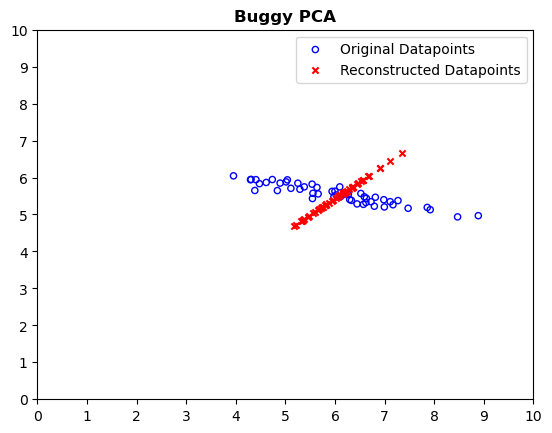

In [33]:
plot(X_2, X_r, "Buggy PCA")

### Demeaned PCA

In [38]:
def demeaned_pca(X, d):
    m,n = X.shape

    # subtract each dimension by its corresponding mean
    X_mean = X - X.mean(axis=0)
    
    # SVD of X
    U, s, V = np.linalg.svd(X_mean)
    eigenvalues = s[0:d]**2
    print(np.matrix(U))
    print(np.matrix(V))
    print(s)
    
    # low dim representation of X
    Z = np.dot(X_mean,V[0:d].T)
    print(Z)
    
    # reduced version of X
    X_r = np.dot(Z.reshape(m,d),V[0:d].reshape(d,n)) + X.mean(axis=0)
    display(X_r)
    
    return (eigenvalues, X_r)

In [39]:
eigenvalues, X_r = demeaned_pca(X=X_2, d=1)
demeaned_pca_ssd = square_sum_of_diffs(X_2, X_r)
print("Squared Sum of Differences on 2D Data: %.6f"%demeaned_pca_ssd)

[[-1.55063235e-01 -1.52980947e-01  3.66227875e-02 ...  1.01168827e-01
   8.89893229e-03 -9.68229145e-02]
 [ 2.17126736e-01 -2.24802404e-02 -2.58393732e-01 ...  7.15014468e-03
   2.47076741e-02 -5.28836014e-02]
 [ 1.28642527e-01 -2.33001809e-01  9.36090466e-01 ... -4.61731219e-03
   5.33606834e-03 -6.56063512e-03]
 ...
 [ 9.13419481e-02  3.98033997e-02  3.30575890e-03 ...  9.91308679e-01
  -1.35977285e-03  9.45618228e-03]
 [-7.83584877e-04  2.63277549e-02  6.29761043e-03 ... -6.28774106e-04
   9.99342662e-01  1.75289772e-03]
 [-7.05571453e-02 -8.17399726e-02 -1.46493291e-02 ...  8.05845023e-03
   2.32954873e-03  9.89188766e-01]]
[[-0.9755276   0.21987702]
 [-0.21987702 -0.9755276 ]]
[8.10422207 0.70732191]
[[-1.25666689]
 [ 1.75964328]
 [ 1.04254761]
 [-1.50144494]
 [-0.30049886]
 [ 0.41511755]
 [ 0.45981605]
 [ 1.17554697]
 [-0.15374326]
 [ 0.81605848]
 [-0.732998  ]
 [ 1.44329047]
 [-0.10890701]
 [-0.97199083]
 [ 0.66813814]
 [-0.48424736]
 [ 0.03994732]
 [ 0.53061027]
 [ 0.35384677]


array([[7.24489297, 5.2706226 ],
       [4.30239915, 5.93383989],
       [5.00194577, 5.77616703],
       [7.48368071, 5.21680153],
       [6.31212467, 5.48086197],
       [5.61402111, 5.63820958],
       [5.57041649, 5.64803775],
       [4.87220122, 5.80541053],
       [6.16896052, 5.51313016],
       [5.22289216, 5.72636727],
       [6.73403951, 5.38576535],
       [4.61101005, 5.86428117],
       [6.12522153, 5.52298862],
       [6.96718361, 5.33321632],
       [5.36719254, 5.69384299],
       [6.4913764 , 5.4404599 ],
       [5.98001002, 5.55571827],
       [5.50135478, 5.66360377],
       [5.67379245, 5.62473754],
       [7.17286051, 5.2868582 ],
       [6.04829966, 5.54032626],
       [6.79080321, 5.37297122],
       [6.64030842, 5.40689168],
       [6.35012591, 5.47229676],
       [7.91581003, 5.11940264],
       [3.94513184, 6.01436541],
       [4.29449899, 5.93562052],
       [4.71143974, 5.84164503],
       [7.10120088, 5.30300978],
       [6.25534008, 5.49366082],
       [5.

Squared Sum of Differences on 2D Data: 0.010006


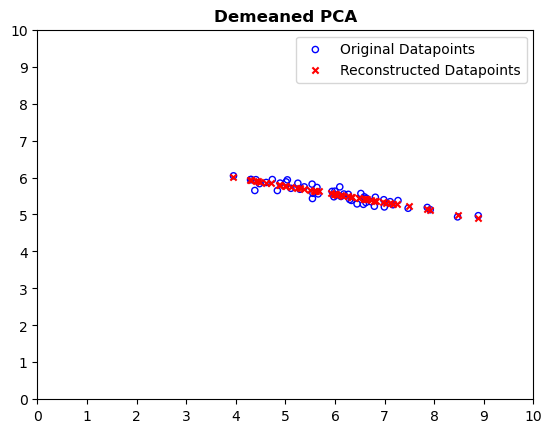

In [40]:
plot(X_2, X_r, "Demeaned PCA")

### Normalized PCA

In [41]:
def normalized_pca(X, d):
    m,n = X.shape

    # normalization of the data
    X_mean = (X - X.mean(axis=0))
    X_sigma = np.sqrt(np.sum(np.square(X_mean),axis=0)/len(X))
    X_norm = X_mean / X_sigma
    
    # SVD of X
    U, s, V = np.linalg.svd(X_norm)
    eigenvalues = s[0:d]**2
    print(np.matrix(U))
    print(np.matrix(V))
    print(s)
    
    # low dim representation of X
    Z = np.dot(X_norm,V[0:d].T)
    print(Z)
    
    # reduced version of X
    X_r = (np.dot(Z.reshape(m,d),V[0:d].reshape(d,n))*X_sigma) + X.mean(axis=0)
    display(X_r)
    
    return (eigenvalues, X_r)

In [42]:
eigenvalues, X_r = normalized_pca(X=X_2, d=1)
normalized_pca_ssd = square_sum_of_diffs(X_2, X_r)
print("Squared Sum of Differences on 2D Data: %.6f"%normalized_pca_ssd)

[[-1.26079421e-01 -1.77628141e-01  3.66227875e-02 ...  1.01168827e-01
   8.89893229e-03 -9.68229145e-02]
 [ 2.17726194e-01  1.56424153e-02 -2.58393732e-01 ...  7.15014468e-03
   2.47076741e-02 -5.28836014e-02]
 [ 1.67222182e-01 -2.07063962e-01  9.36090466e-01 ... -4.61731219e-03
   5.33606834e-03 -6.56063512e-03]
 ...
 [ 8.30228751e-02  5.50896025e-02  3.30575890e-03 ...  9.91308679e-01
  -1.35977285e-03  9.45618228e-03]
 [-5.35262350e-03  2.57898062e-02  6.29761043e-03 ... -6.28774106e-04
   9.99342662e-01  1.75289772e-03]
 [-5.52582222e-02 -9.27699453e-02 -1.46493291e-02 ...  8.05845023e-03
   2.32954873e-03  9.89188766e-01]]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[9.81133203 1.9333297 ]
[[-1.23700706e+00]
 [ 2.13618398e+00]
 [ 1.64067235e+00]
 [-1.90972985e+00]
 [-5.46712976e-01]
 [ 7.24909098e-01]
 [ 3.62624524e-01]
 [ 1.01094109e+00]
 [-8.34974084e-02]
 [ 1.26934228e+00]
 [-9.74734199e-01]
 [ 1.72507372e+00]
 [-2.14660498e-01]
 [-9.94996919e-01]
 [ 9.28096557e-01]


array([[6.9971334 , 5.31055961],
       [4.32980894, 5.95513034],
       [4.72163089, 5.86044484],
       [7.5290837 , 5.18201148],
       [6.45128875, 5.44246538],
       [5.44576353, 5.68545499],
       [5.73223723, 5.61622736],
       [5.21958596, 5.7401118 ],
       [6.08500466, 5.53097955],
       [5.01525724, 5.78948874],
       [6.78974319, 5.36067638],
       [4.65489117, 5.87657279],
       [6.18872085, 5.50591608],
       [6.80576578, 5.35680445],
       [5.28509463, 5.72428134],
       [6.22591263, 5.49692852],
       [5.83506257, 5.59137916],
       [5.21135855, 5.74209999],
       [5.81809561, 5.5954793 ],
       [7.1798948 , 5.26639452],
       [5.64387092, 5.63758147],
       [6.58188169, 5.41090702],
       [6.7822956 , 5.36247612],
       [6.51778721, 5.42639574],
       [7.83243778, 5.10870463],
       [3.95415543, 6.04590867],
       [4.34405858, 5.95168686],
       [4.55259677, 5.90129268],
       [6.97934675, 5.31485784],
       [6.14664691, 5.51608343],
       [5.

Squared Sum of Differences on 2D Data: 0.049472


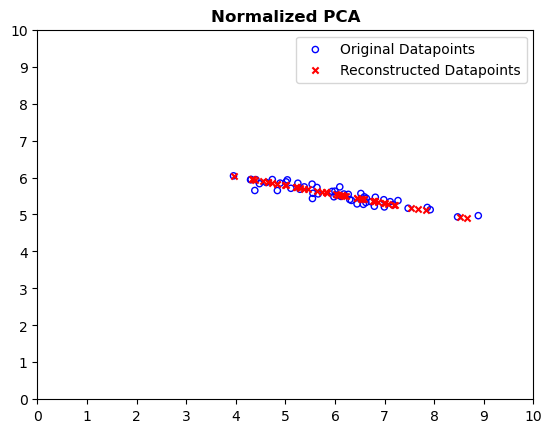

In [43]:
plot(X_2, X_r, "Normalized PCA")

### Dimensionality Reduction via Optimization (DRO)

In [46]:
def DRO(X, d):
    m,n = X.shape

    # eigen decomp
    X_mean = (X - X.mean(axis=0))
    eigenvalues, eigenvectors = np.linalg.eig(np.cov(X_mean.T))
    
    # sort eigenvector & eigenvalue pairs
    sorted_indices = np.argsort(-np.abs(eigenvalues))
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = -1*eigenvectors[:, sorted_indices]
    print(sorted_eigenvalues)
    print(sorted_eigenvectors)

    # low dim representation of X
    Z = np.dot(X_mean,eigenvectors.T[0:d].T)
    print(Z)
    
    # reduced version of X
    X_r = np.dot(Z.reshape(m,d),eigenvectors.T[0:d].reshape(d,n)) + X.mean(axis=0)
    display(X_r)
    
    return (eigenvalues, eigenvectors, X_r)

In [47]:
(eigenvalues, eigenvectors, X_r) = DRO(X=X_2, d=1)
dro_ssd = square_sum_of_diffs(X_2, X_r)
print("Squared Sum of Differences on 2D Data: %.6f"%dro_ssd)

[1.34037582 0.01021029]
[[-0.9755276  -0.21987702]
 [ 0.21987702 -0.9755276 ]]
[[ 1.25666689]
 [-1.75964328]
 [-1.04254761]
 [ 1.50144494]
 [ 0.30049886]
 [-0.41511755]
 [-0.45981605]
 [-1.17554697]
 [ 0.15374326]
 [-0.81605848]
 [ 0.732998  ]
 [-1.44329047]
 [ 0.10890701]
 [ 0.97199083]
 [-0.66813814]
 [ 0.48424736]
 [-0.03994732]
 [-0.53061027]
 [-0.35384677]
 [ 1.1828274 ]
 [ 0.03005545]
 [ 0.79118569]
 [ 0.63691553]
 [ 0.33945342]
 [ 1.94441479]
 [-2.12587312]
 [-1.76774162]
 [-1.34034136]
 [ 1.10937009]
 [ 0.24228975]
 [-0.09453281]
 [-0.92269709]
 [-1.16565628]
 [-0.02659295]
 [-0.43806882]
 [ 0.47126704]
 [ 2.52555064]
 [ 2.92572926]
 [-1.61937915]
 [-1.5690933 ]
 [-1.05461015]
 [ 0.62104362]
 [ 0.59865504]
 [ 1.87294909]
 [ 1.02603344]
 [ 0.82514806]
 [-1.66214157]
 [-0.74025543]
 [ 0.00635035]
 [ 0.57181077]]


array([[7.24489297, 5.2706226 ],
       [4.30239915, 5.93383989],
       [5.00194577, 5.77616703],
       [7.48368071, 5.21680153],
       [6.31212467, 5.48086197],
       [5.61402111, 5.63820958],
       [5.57041649, 5.64803775],
       [4.87220122, 5.80541053],
       [6.16896052, 5.51313016],
       [5.22289216, 5.72636727],
       [6.73403951, 5.38576535],
       [4.61101005, 5.86428117],
       [6.12522153, 5.52298862],
       [6.96718361, 5.33321632],
       [5.36719254, 5.69384299],
       [6.4913764 , 5.4404599 ],
       [5.98001002, 5.55571827],
       [5.50135478, 5.66360377],
       [5.67379245, 5.62473754],
       [7.17286051, 5.2868582 ],
       [6.04829966, 5.54032626],
       [6.79080321, 5.37297122],
       [6.64030842, 5.40689168],
       [6.35012591, 5.47229676],
       [7.91581003, 5.11940264],
       [3.94513184, 6.01436541],
       [4.29449899, 5.93562052],
       [4.71143974, 5.84164503],
       [7.10120088, 5.30300978],
       [6.25534008, 5.49366082],
       [5.

Squared Sum of Differences on 2D Data: 0.010006


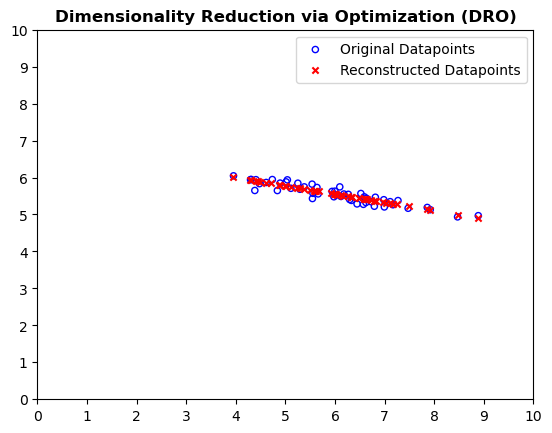

In [48]:
plot(X_2, X_r, "Dimensionality Reduction via Optimization (DRO)")

### Choosing d for 1000-d Dataset by finding the "Knee Point"

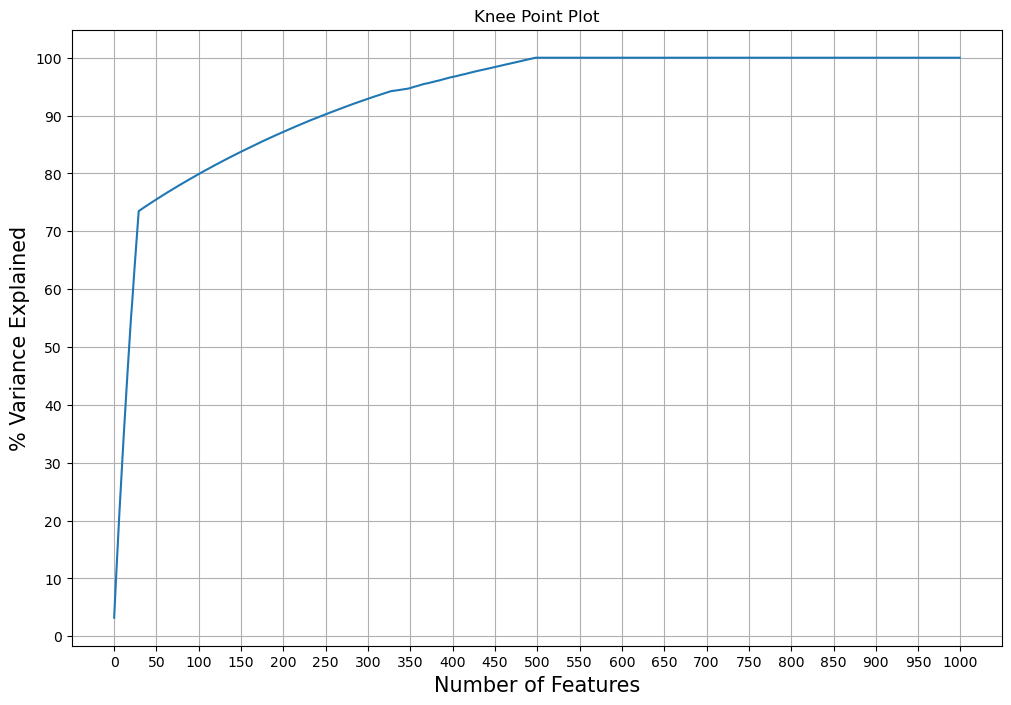

In [49]:
# observe the singular values in DRO and see if there is a clear knee point
X_mean = (X_1000 - X_1000.mean(axis=0))
eigenvalues, eigenvectors = np.linalg.eig(np.cov(X_mean.T))
s = np.nan_to_num(np.sqrt(eigenvalues.real))
sum_singular_values = sum(s)
singular_value_props = []
for s_i in s:
    singular_value_props.append(s_i / sum_singular_values)
cumulative_singular_value_props = np.cumsum(singular_value_props)

# Plot to find the "knee point"
plt.figure(figsize=(12, 8))
plt.xticks(np.arange(0,1025,50))
plt.yticks(np.arange(0,101,10))
plt.grid()
plt.ylabel("% Variance Explained",fontsize=15)
plt.xlabel("Number of Features",fontsize=15)
plt.title("Knee Point Plot")
plt.plot(cumulative_singular_value_props*100);

In [50]:
(eigenvalues, X_r) = buggy_pca(X=X_1000, d=500)
buggy_pca_ssd_1000 = square_sum_of_diffs(X_1000, X_r)
print("Squared Sum of Differences:",buggy_pca_ssd_1000)

[[-0.045036    0.07489276  0.02433726 ...  0.03753669 -0.02057926
   0.03029843]
 [-0.04442832 -0.03842951  0.0599204  ...  0.02796566 -0.03413609
  -0.03761656]
 [-0.04508273 -0.03687685 -0.01183997 ... -0.00954207  0.04534471
   0.03603848]
 ...
 [-0.04520549  0.04414523  0.02389625 ... -0.05811965  0.02429471
   0.07807641]
 [-0.04481105  0.03662062 -0.05966928 ...  0.02538327  0.03783986
   0.04895933]
 [-0.04505494 -0.01844147 -0.02106331 ...  0.03553258 -0.01159931
   0.02976871]]
[[-1.49141646e-02 -6.47316901e-03 -2.11866894e-02 ... -2.59360039e-02
  -3.43063920e-02 -1.88965179e-02]
 [-1.26766616e-03 -1.73219913e-02 -2.23126719e-02 ... -3.14731509e-02
  -5.70854846e-02  3.29736046e-02]
 [ 2.69144394e-03 -1.18858052e-02  2.21795233e-02 ... -9.91792126e-05
  -4.54537806e-02  1.26635068e-02]
 ...
 [ 4.89200770e-02  3.08667163e-02 -2.01495993e-02 ...  4.68365413e-01
   3.45813211e-04  2.03064988e-02]
 [-1.03996696e-02  4.20569452e-02  1.95916259e-02 ... -1.47153540e-02
   5.16977233

array([[ 1.33168104e+01,  2.90287802e+00,  1.38870348e+01, ...,
         2.22139385e+01,  2.64470131e+01,  1.37326379e+01],
       [ 1.30543587e+01,  1.03359739e+01,  1.38135916e+01, ...,
         2.18243147e+01,  2.48470775e+01,  1.05123768e+01],
       [ 8.10029873e+00,  1.48301692e+01,  1.11557492e+01, ...,
         2.09040550e+01,  2.51160597e+01,  7.13864040e+00],
       ...,
       [ 1.27980811e+01,  3.87267740e+00,  1.49498396e+01, ...,
         2.01927154e+01,  2.08078592e+01,  1.31894303e+01],
       [ 9.65246243e+00, -5.40115960e+00,  9.67989551e+00, ...,
         1.86843981e+01,  3.38934238e+01,  9.60106349e+00],
       [-6.69259823e-04, -7.92208010e+00,  2.80317271e+01, ...,
         1.06673121e+01,  1.49384409e+01,  1.51857918e+01]])

Squared Sum of Differences: 1.9870471309759047e-24


In [51]:
(eigenvalues, X_r) = demeaned_pca(X=X_1000, d=500)
demeaned_pca_ssd_1000 = square_sum_of_diffs(X_1000, X_r)
print("Squared Sum of Differences:",demeaned_pca_ssd_1000)

[[-0.07556245  0.02329566 -0.03469873 ... -0.01729477  0.03253594
  -0.04472136]
 [ 0.03750517  0.06048734  0.01107793 ... -0.03314434 -0.03747652
  -0.04472136]
 [ 0.03680255 -0.01098696  0.00537232 ...  0.0454573   0.03571787
  -0.04472136]
 ...
 [-0.04483001  0.02338903 -0.01593183 ...  0.01970725  0.07324261
  -0.04472136]
 [-0.03576025 -0.06014611  0.01533967 ...  0.04044184  0.05080722
  -0.04472136]
 [ 0.0184843  -0.02046538  0.08744672 ... -0.00916982  0.03035653
  -0.04472136]]
[[ 1.07454913e-03  1.71844317e-02  2.13716348e-02 ...  3.09795027e-02
   5.70540977e-02 -3.33059224e-02]
 [ 2.81703723e-03 -1.12923801e-02  2.30467663e-02 ...  8.55357325e-04
  -4.38027924e-02  1.21913582e-02]
 [-7.08817657e-02 -2.20420442e-05  5.41126145e-02 ...  3.78182235e-02
  -3.13150676e-02 -3.41349925e-02]
 ...
 [ 5.66697671e-02 -3.28346988e-02  2.59563868e-02 ...  4.81700540e-01
  -2.28983019e-02  6.71345781e-03]
 [ 1.29569040e-02 -3.87485594e-02  7.51493107e-02 ... -8.90589299e-04
   5.04958339

array([[ 1.33168104e+01,  2.90287802e+00,  1.38870348e+01, ...,
         2.22139385e+01,  2.64470131e+01,  1.37326379e+01],
       [ 1.30543587e+01,  1.03359739e+01,  1.38135916e+01, ...,
         2.18243147e+01,  2.48470775e+01,  1.05123768e+01],
       [ 8.10029873e+00,  1.48301692e+01,  1.11557492e+01, ...,
         2.09040550e+01,  2.51160597e+01,  7.13864040e+00],
       ...,
       [ 1.27980811e+01,  3.87267740e+00,  1.49498396e+01, ...,
         2.01927154e+01,  2.08078592e+01,  1.31894303e+01],
       [ 9.65246243e+00, -5.40115960e+00,  9.67989551e+00, ...,
         1.86843981e+01,  3.38934238e+01,  9.60106349e+00],
       [-6.69259824e-04, -7.92208010e+00,  2.80317271e+01, ...,
         1.06673121e+01,  1.49384409e+01,  1.51857918e+01]])

Squared Sum of Differences: 2.1797399257833454e-25


In [52]:
(eigenvalues, X_r) = normalized_pca(X=X_1000, d=500)
normalized_pca_ssd_1000 = square_sum_of_diffs(X_1000, X_r)
print("Squared Sum of Differences:",normalized_pca_ssd_1000)

[[ 0.07497266 -0.01873154  0.02948444 ...  0.02412975 -0.03692191
   0.04472136]
 [-0.00563     0.07088274  0.00033548 ...  0.04849344  0.02398542
   0.04472136]
 [-0.0344123   0.009815    0.00637996 ... -0.03631919 -0.03809483
   0.04472136]
 ...
 [ 0.0543996  -0.00020795  0.00502331 ... -0.02534524 -0.0674977
   0.04472136]
 [-0.00364379 -0.08584007 -0.01412981 ... -0.0411658  -0.04423624
   0.04472136]
 [-0.04077726 -0.01921986 -0.09074751 ...  0.02623188 -0.03306268
   0.04472136]]
[[ 9.30618877e-03 -2.33866764e-02 -1.30183194e-02 ... -2.52097974e-02
  -5.67710588e-02  4.45225836e-02]
 [ 1.20811597e-02  8.19483439e-03  1.48011112e-02 ...  2.01308280e-02
   3.32887180e-04 -1.00314062e-03]
 [ 7.67636372e-02  1.05569321e-02 -5.19640477e-02 ... -3.05917348e-02
   3.64513927e-02  2.63721014e-02]
 ...
 [-9.26719845e-03  2.34958743e-02 -7.20937913e-03 ...  4.82266252e-01
   3.26851996e-02  2.76202635e-02]
 [-1.85774824e-02 -2.73143126e-02  1.74119330e-02 ...  2.32277124e-02
   5.91642815e

array([[ 1.33168104e+01,  2.90287802e+00,  1.38870348e+01, ...,
         2.22139385e+01,  2.64470131e+01,  1.37326379e+01],
       [ 1.30543587e+01,  1.03359739e+01,  1.38135916e+01, ...,
         2.18243147e+01,  2.48470775e+01,  1.05123768e+01],
       [ 8.10029873e+00,  1.48301692e+01,  1.11557492e+01, ...,
         2.09040550e+01,  2.51160597e+01,  7.13864040e+00],
       ...,
       [ 1.27980811e+01,  3.87267740e+00,  1.49498396e+01, ...,
         2.01927154e+01,  2.08078592e+01,  1.31894303e+01],
       [ 9.65246243e+00, -5.40115960e+00,  9.67989551e+00, ...,
         1.86843981e+01,  3.38934238e+01,  9.60106349e+00],
       [-6.69259823e-04, -7.92208010e+00,  2.80317271e+01, ...,
         1.06673121e+01,  1.49384409e+01,  1.51857918e+01]])

Squared Sum of Differences: 2.1663117853438416e-25


In [53]:
(eigenvalues, eigenvectors, X_r) = DRO(X=X_1000, d=500)
dro_ssd_1000 = square_sum_of_diffs(X_1000, X_r.real)
print("Squared Sum of Differences:",dro_ssd_1000)

[ 1.64839387e+03+0.00000000e+00j  1.62089250e+03+0.00000000e+00j
  1.46867055e+03+0.00000000e+00j  1.35119459e+03+0.00000000e+00j
  1.35059242e+03+0.00000000e+00j  1.31393736e+03+0.00000000e+00j
  1.21388917e+03+0.00000000e+00j  1.14157201e+03+0.00000000e+00j
  1.13335087e+03+0.00000000e+00j  1.10019982e+03+0.00000000e+00j
  1.08943658e+03+0.00000000e+00j  1.05427885e+03+0.00000000e+00j
  9.92412605e+02+0.00000000e+00j  9.51961020e+02+0.00000000e+00j
  9.42273839e+02+0.00000000e+00j  9.29581349e+02+0.00000000e+00j
  9.01343116e+02+0.00000000e+00j  8.74015295e+02+0.00000000e+00j
  8.51501088e+02+0.00000000e+00j  8.24307483e+02+0.00000000e+00j
  8.01394319e+02+0.00000000e+00j  7.55169360e+02+0.00000000e+00j
  7.35623394e+02+0.00000000e+00j  7.06065961e+02+0.00000000e+00j
  6.70311657e+02+0.00000000e+00j  6.54232918e+02+0.00000000e+00j
  6.34952440e+02+0.00000000e+00j  6.22937383e+02+0.00000000e+00j
  5.86753748e+02+0.00000000e+00j  5.31071421e+02+0.00000000e+00j
  1.65366208e+00+0.000000

array([[ 1.33168104e+01+0.j,  2.90287802e+00+0.j,  1.38870348e+01+0.j,
        ...,  2.22139385e+01+0.j,  2.64470131e+01+0.j,
         1.37326379e+01+0.j],
       [ 1.30543587e+01+0.j,  1.03359739e+01+0.j,  1.38135916e+01+0.j,
        ...,  2.18243147e+01+0.j,  2.48470775e+01+0.j,
         1.05123768e+01+0.j],
       [ 8.10029873e+00+0.j,  1.48301692e+01+0.j,  1.11557492e+01+0.j,
        ...,  2.09040550e+01+0.j,  2.51160597e+01+0.j,
         7.13864040e+00+0.j],
       ...,
       [ 1.27980811e+01+0.j,  3.87267740e+00+0.j,  1.49498396e+01+0.j,
        ...,  2.01927154e+01+0.j,  2.08078592e+01+0.j,
         1.31894303e+01+0.j],
       [ 9.65246243e+00+0.j, -5.40115960e+00+0.j,  9.67989551e+00+0.j,
        ...,  1.86843981e+01+0.j,  3.38934238e+01+0.j,
         9.60106349e+00+0.j],
       [-6.69259817e-04+0.j, -7.92208010e+00+0.j,  2.80317271e+01+0.j,
        ...,  1.06673121e+01+0.j,  1.49384409e+01+0.j,
         1.51857918e+01+0.j]])

Squared Sum of Differences: 1.5144478581938267e-20


### Squared Sum of the Differences

In [55]:
print("Reconstruction Errors for 2D Dataset:")
print("\tBuggy PCA: %.8f" % buggy_pca_ssd)
print("\tDemeaned PCA: %.8f" % demeaned_pca_ssd)
print("\tNormalized PCA: %.8f" % normalized_pca_ssd)
print("\tDRO: %.8f" % dro_ssd)

print("\nReconstruction Errors for 1000D Dataset:")
print("\tBuggy PCA:", buggy_pca_ssd_1000)
print("\tDemeaned PCA:", demeaned_pca_ssd_1000)
print("\tNormalized PCA:", normalized_pca_ssd_1000)
print("\tDRO:", dro_ssd_1000)

Reconstruction Errors for 2D Dataset:
	Buggy PCA: 0.88690308
	Demeaned PCA: 0.01000609
	Normalized PCA: 0.04947208
	DRO: 0.01000609

Reconstruction Errors for 1000D Dataset:
	Buggy PCA: 1.9870471309759047e-24
	Demeaned PCA: 2.1797399257833454e-25
	Normalized PCA: 2.1663117853438416e-25
	DRO: 1.5144478581938267e-20
